In [ ]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Set the path to your dataset
DATASET_PATH = "/content/archive (3).zip"
EXTRACT_DIR = "/content/data"  # Directory to extract the dataset to

# Extract the dataset if it hasn't been extracted yet
if not os.path.exists(EXTRACT_DIR):
    with zipfile.ZipFile(DATASET_PATH, 'r') as zip_ref:
        zip_ref.extractall(EXTRACT_DIR)

In [ ]:

# Update paths to point to the extracted data directories
TRAIN_DIR = os.path.join(EXTRACT_DIR, "/content/data/ASD_v4_datasets/train")
val_dir = os.path.join(EXTRACT_DIR, "/content/data/ASD_v4_datasets/valid")
TEST_DIR = os.path.join(EXTRACT_DIR, "/content/data/ASD_v4_datasets/test")

In [ ]:
# Image preprocessing and augmentation
datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = datagen.flow_from_directory(
    TEST_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # For consistent evaluation
)

Found 2526 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 280 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50V2

# Load ResNet50V2 pre-trained model
resnet_base = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze ResNet50V2 base layers
for layer in resnet_base.layers:
    layer.trainable = False

# Add custom classification layers
model = Sequential([
    resnet_base,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification: autism or not_autism
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)              │ (None, 7, 7, 2048)          │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,410,113 (138.89 MB)

 Trainable params: 12,845,313 (49.00 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 505s 6s/step - accuracy: 0.5426 - loss: 4.0679 - val_accuracy: 0.7875 - val_loss: 0.4690
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 499s 6s/step - accuracy: 0.6759 - loss: 0.5626 - val_accuracy: 0.8375 - val_loss: 0.4279
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 503s 6s/step - accuracy: 0.7149 - loss: 0.5009 - val_accuracy: 0.8500 - val_loss: 0.3042
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 550s 6s/step - accuracy: 0.7505 - loss: 0.4536 - val_accuracy: 0.8875 - val_loss: 0.2932
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 500s 6s/step - accuracy: 0.7545 - loss: 0.4091 - val_accuracy: 0.8875 - val_loss: 0.2202
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 506s 6s/step - accuracy: 0.7578 - loss: 0.4097 - val_accuracy: 0.9000 - val_loss: 0.2177
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 510s 6s/step - accuracy: 0.7836 - loss: 0.3516 - val_accuracy: 0.8750 - val_loss: 0.2360
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 490s 6s/step - accuracy: 0.8146 - loss: 0.3247 - val_accuracy: 0.8750 - val_loss: 0.

In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


9/9 ━━━━━━━━━━━━━━━━━━━━ 51s 5s/step - accuracy: 0.9525 - loss: 0.1151
Test Accuracy: 92.14%


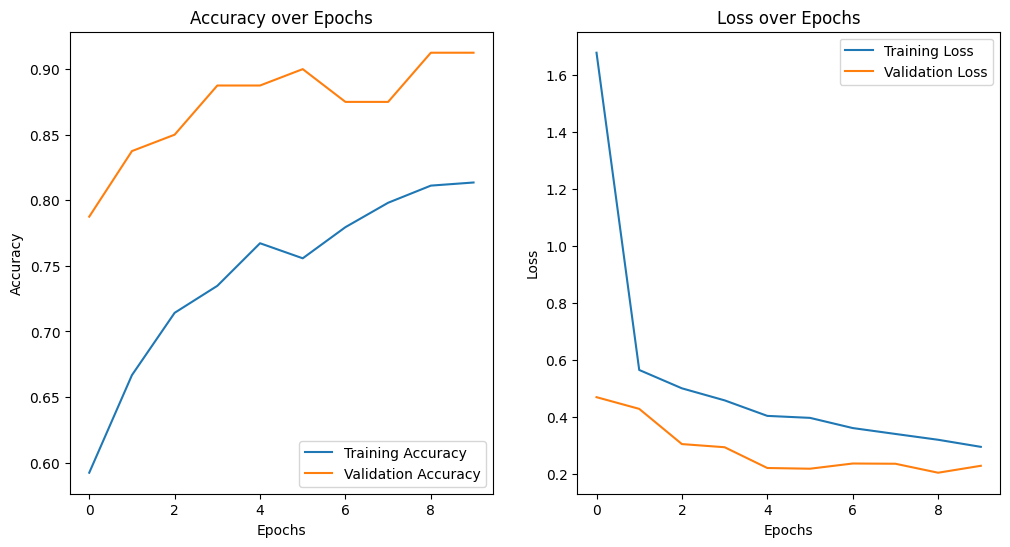

In [ ]:
# Plot training accuracy and loss
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
# Predict on test data
predictions = (model.predict(test_generator) > 0.5).astype(int)

# Confusion matrix
conf_matrix = confusion_matrix(test_generator.classes, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
report = classification_report(test_generator.classes, predictions, target_names=test_generator.class_indices.keys())
print("Classification Report:")
print(report)


9/9 ━━━━━━━━━━━━━━━━━━━━ 54s 6s/step
Confusion Matrix:
[[134   6]
 [ 16 124]]
Classification Report:
              precision    recall  f1-score   support

    autistic       0.89      0.96      0.92       140
non_autistic       0.95      0.89      0.92       140

    accuracy                           0.92       280
   macro avg       0.92      0.92      0.92       280
weighted avg       0.92      0.92      0.92       280



In [ ]:
def predict_single_image(image_path, model, class_labels):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    predicted_class = class_labels[int(prediction > 0.5)]
    return img, predicted_class

# Path to a test image
test_image_path = "/content/data/ASD_v4_datasets/valid/Autistic/va.13.jpg"  # Replace with actual image path

# Predict and display result
class_labels = list(test_generator.class_indices.keys())
image, result = predict_single_image(test_image_path, model, class_labels)

plt.imshow(image)
plt.title(f"Predicted: {result}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


<ipython-input-13-05d44a9d52bc>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = class_labels[int(prediction > 0.5)]


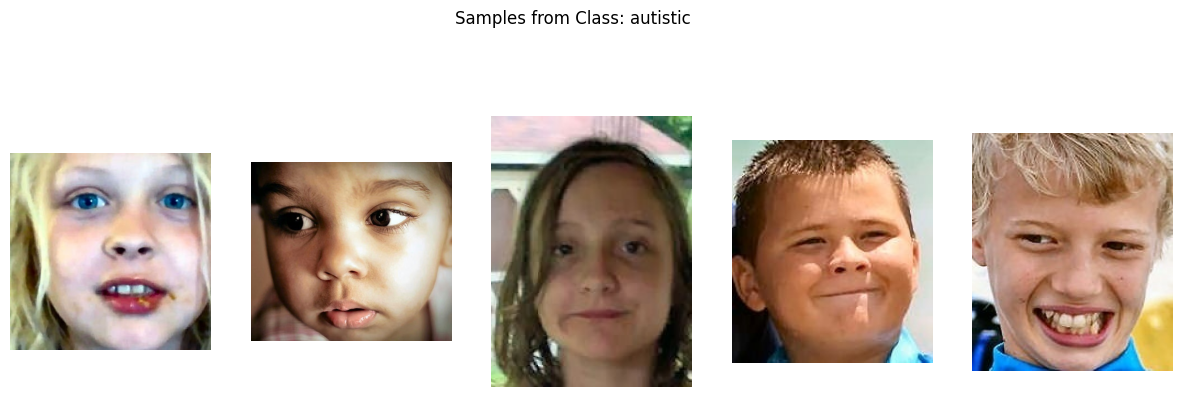

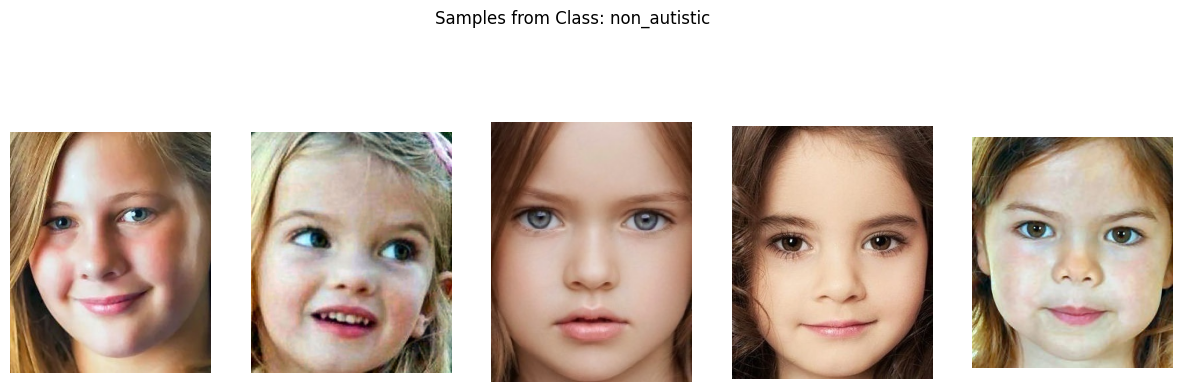

In [ ]:
# 1. Visualize the dataset
def visualize_samples(data_dir, num_samples=5):
    classes = os.listdir(data_dir)
    for cls in classes:
        class_dir = os.path.join(data_dir, cls)
        sample_images = os.listdir(class_dir)[:num_samples]
        plt.figure(figsize=(15, 5))
        plt.suptitle(f"Samples from Class: {cls}")
        for i, img_name in enumerate(sample_images):
            img_path = os.path.join(class_dir, img_name)
            img = plt.imread(img_path)
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(img)
            plt.axis('off')
        plt.show()

visualize_samples(TRAIN_DIR)